# Desafío Lunes Semana 23 - Gráficos

#### Gustavo Morales, G10 - 23.Sep.2019

### Ejercicio 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = "qog_std_cs_jan18.csv"
df = pd.read_csv(fname)

In [3]:
random_seed = 382  # RUT ends in 038-2

In [4]:
df_sample = df[['cname',
                'undp_hdi',
                'ccodealp',
                'ht_region',
                'gle_cgdpc',
                'imf_pop',
                'ffp_hf',
                'wef_qes',
                'wdi_expedu',
                'wdi_ners']].sample(frac=0.5, random_state=random_seed)

In [5]:
df_sample['region'] = df_sample['ht_region'].replace(
            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem',
             'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean']
)

**(R)** El objeto `Pandas` a utilizar en el siguiente ejercicio es:

In [6]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 149 to 141
Data columns (total 11 columns):
cname         97 non-null object
undp_hdi      94 non-null float64
ccodealp      97 non-null object
ht_region     97 non-null int64
gle_cgdpc     95 non-null float64
imf_pop       79 non-null float64
ffp_hf        87 non-null float64
wef_qes       76 non-null float64
wdi_expedu    77 non-null float64
wdi_ners      65 non-null float64
region        97 non-null object
dtypes: float64(7), int64(1), object(3)
memory usage: 9.1+ KB


### Ejercicio 2

In [7]:
df_sample.columns.tolist()

['cname',
 'undp_hdi',
 'ccodealp',
 'ht_region',
 'gle_cgdpc',
 'imf_pop',
 'ffp_hf',
 'wef_qes',
 'wdi_expedu',
 'wdi_ners',
 'region']

Variables continuas: `undp_hdi`, `gle_cgdpc`, `imf_pop`, `ffp_hf`, `wef_qes`, `wdi_expedu`, `wdi_ners`.

Variables discretas: `cname`, `ccodealp`, `region`.

In [8]:
def compute_stats(dataframe):
    dataframe_numeric = dataframe.select_dtypes(exclude=['object'])
    dataframe_categor = dataframe.select_dtypes(include=['object'])
    pd.options.display.float_format = "{:.2f}".format
    
    print(dataframe_numeric.describe())
    
    for var in dataframe_categor.columns.tolist():
        print(dataframe_categor[var].value_counts())

In [9]:
compute_stats(df_sample)

       undp_hdi  ht_region  gle_cgdpc  imf_pop  ffp_hf  wef_qes  wdi_expedu  \
count     94.00      97.00      95.00    79.00   87.00    76.00       77.00   
mean       0.70       4.52   15462.06    26.20    5.47     3.73        4.58   
std        0.16       2.66   19270.02    49.02    2.10     0.88        1.59   
min        0.39       1.00     324.16     0.01    1.50     2.13        1.71   
25%        0.56       2.00    2680.54     1.20    3.55     3.14        3.32   
50%        0.73       4.00    7454.88     6.93    5.70     3.66        4.75   
75%        0.84       6.00   23316.80    24.16    7.10     4.33        5.50   
max        0.95      10.00  104049.44   252.16    9.30     5.82        7.85   

       wdi_ners  
count     65.00  
mean      75.04  
std       20.82  
min       26.49  
25%       64.43  
50%       82.48  
75%       92.21  
max       99.47  
Serbia                   1
Venezuela                1
Brazil                   1
Swaziland                1
United Kingdom    

*(R) Comparación con compañeros:* En general, la descripción estadística no presenta mayores diferencias en comparación con mis compañeros, *excepto* para algunas en donde la semilla usada (distinta para cada caso) sí generó algunas diferencias. Naturalmente, fijando `random_seed`, obtenemos esencialmente los mismos resultados.

### Ejercicio 3

In [10]:
def get_na(dataframe, var, print_list=False):
    """Returns the quantity and fraction of the 'dataframe' where the input variable 'var' is NaN.
    If asked for, returns the 'dataframe' indices of such cases instead.
    """
    na_df = dataframe[var].isna()
    
    # here 'ascending' is set to False to not change the output ordering
    na_quantity = na_df.value_counts(ascending=False)
    na_fraction = na_df.value_counts('%', ascending=False)
    if print_list:
        return dataframe[dataframe[var].isna()][var]
    
    """
    I have no idea how to force value_counts() to not drop an index
    when one boolean frequency is zero, so I will cover all cases.
    I also do not remember how to select by non-integer index, so I had to
    turn off sorting above and select using iloc.
    """
    
    # if SOME values are NaN
    if len(na_quantity)>1 and print_list==False:
        return var, na_quantity.iloc[1], na_fraction.iloc[1]
    # if everything is NaN
    if len(na_quantity)==1 and na_df.value_counts().index[0]==True and print_list==False:
        return var, na_quantity.iloc[0], na_fraction.iloc[0]
    # if nothing is NaN
    if len(na_quantity)==1 and na_df.value_counts().index[0]==False and print_list==False:
        return var, 0 , 0

Para testear la función demuestro que el largo de una columna sólo con NaN's equivalga al largo del dataframe que estoy usando:

In [11]:
df_sample['all_nan_test']=np.nan
get_na(df_sample, 'all_nan_test')[1]==df_sample.shape[0]

True

Lo mismo hago para una columna que no tenga NaN's:

In [12]:
df_sample['no_nan_test']=0
get_na(df_sample, 'no_nan_test')[1]==0

True

Lo cual es correcto. Para analizar todas las variables del dataframe original `df`:

In [13]:
df_sample = df_sample.drop(columns=['all_nan_test', 'no_nan_test'])

In [14]:
results = [ get_na(df, col) for col in df.columns.tolist() ]

In [15]:
variables = [ result[0] for result in results ]
fractions = [ result[2] for result in results ]

In [16]:
s1 = pd.Series(variables, name='variable')
s2 = pd.Series(fractions, name='na_fraction')

Las tres variables con un mayor porcentaje de casos perdidos son:

In [17]:
pd.concat([s1, s2], axis=1).sort_values(by='na_fraction', ascending=False).head(3)

,variable,na_fraction
1191,r_elf61,0.49
181,dpi_dhondt,0.49
816,iaep_ese,0.49


Y para obtener las listas de países correspondientes:

In [18]:
def get_nation_list(dataframe, var):
    print(var)
    for l in dataframe[dataframe[var].isna()]['cname']:
        print(l)
    print('')
    print('---')

In [19]:
var_list = pd.concat([s1, s2], axis=1).sort_values(by='na_fraction', ascending=False).head(3)['variable']
for var in var_list:
    print(var)
    print('---')
    for l in df[df[var].isna()]['cname']:
        print(l)
    print('')
    print('===')

r_elf61
---
Algeria
Andorra
Angola
Antigua and Barbuda
Azerbaijan
Bahamas
Bahrain
Bangladesh
Armenia
Barbados
Bosnia and Herzegovina
Botswana
Belize
Solomon Islands
Brunei
Burundi
Belarus
Cambodia
Cape Verde
Comoros
Croatia
Cyprus (1975-)
Czech Republic
Dominica
Equatorial Guinea
Ethiopia (1993-)
Eritrea
Estonia
Fiji
France (1963-)
Djibouti
Georgia
Gambia
Germany
Kiribati
Grenada
Guyana
Jamaica
Kazakhstan
Kenya
Kyrgyzstan
Lesotho
Latvia
Liechtenstein
Lithuania
Malawi
Maldives
Malta
Mauritius
Monaco
Moldova
Montenegro
Mozambique
Namibia
Nauru
Vanuatu
Micronesia
Marshall Islands
Palau
Pakistan (1971-)
Papua New Guinea
Guinea-Bissau
Timor-Leste
Qatar
Russia
Rwanda
St Kitts and Nevis
St Lucia
St Vincent and the Grenadines
San Marino
Sao Tome and Principe
Serbia
Seychelles
Singapore
Slovakia
Vietnam
Slovenia
Zimbabwe
South Sudan
Sudan (2012-)
Suriname
Swaziland
Tajikistan
Tonga
Trinidad and Tobago
United Arab Emirates
Turkmenistan
Tuvalu
Uganda
Ukraine
Macedonia
Tanzania
Uzbekistan
Samoa
Ye

### Ejercicio 4

In [20]:
def plot_sample_histogram(dataframe, var, true_mean, sample_mean=False):
    dataframe_sample = dataframe.dropna().sample(frac=0.5, random_state=random_seed)
    mean_tot = dataframe[var].dropna().mean()
    stdd_tot = dataframe[var].dropna().std()
    mean_sam = dataframe_sample[var].mean()
    plt.hist(dataframe[var].dropna(), color='lightgrey')
    plt.axvline(mean_tot, lw=3, color='tomato', ls='-', label='true_mean')
    if sample_mean:
        plt.axvline(mean_sam, lw=3, color='dodgerblue', ls='--', label='sample_mean')
    plt.axvspan(mean_tot-stdd_tot, mean_tot+stdd_tot, alpha=0.1, color='red', label=r'$\mu \pm \sigma$')
    plt.xlabel(var)
    plt.legend()
    plt.tight_layout()

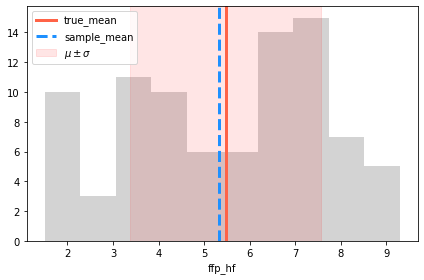

In [21]:
plot_sample_histogram(df_sample, 'ffp_hf', True, sample_mean=True)

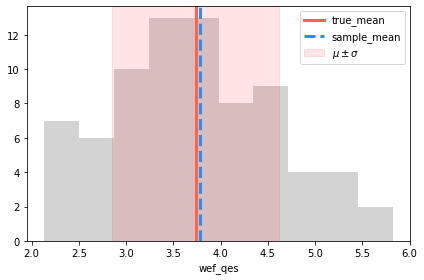

In [22]:
plot_sample_histogram(df_sample, 'wef_qes', True, sample_mean=True)

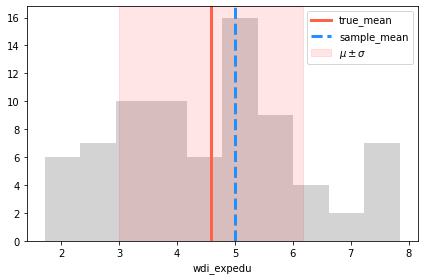

In [23]:
plot_sample_histogram(df_sample, 'wdi_expedu', True, sample_mean=True)

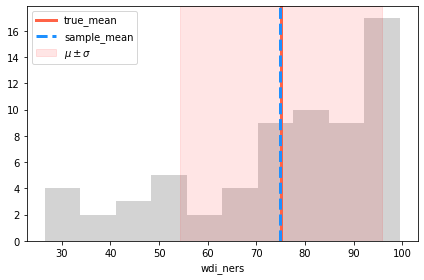

In [24]:
plot_sample_histogram(df_sample, 'wdi_ners', True, sample_mean=True)

**(R)** En general todas las variables tienen la media muestral similar a la media total, lo cual se puede usar para justificar que la muestra es representativa.

### Ejercicio 5

In [25]:
pd.concat([s1, s2], axis=1).sort_values(by='na_fraction').head(4)

,variable,na_fraction
0,ccode,0.00
639,fh_pr,0.00
640,fh_rol,0.00
641,fh_status,0.00


Escogeré `fh_pr`, `fh_rol` y `fh_status`.

In [26]:
def plot_dotplot(dataframe, plot_var, plot_by, global_stat=False, statistic='mean'):
    if statistic=='mean':
        stat = dataframe.groupby(plot_by)[plot_var].mean()
    if statistic=='median':
        stat = dataframe.groupby(plot_by)[plot_var].median()
    plt.plot(stat.values, stat.index.tolist(), 'o', label=plot_by)
    if global_stat:
        mean_tot = dataframe[plot_var].dropna().mean()
        plt.axvline(mean_tot, lw=2, color='tomato', ls='--', label='true_mean')
    plt.legend()
    plt.grid(axis='y')
    plt.xlabel(plot_var)
    plt.tight_layout()

In [27]:
df['region'] = df['ht_region'].replace(
            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem',
             'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'])

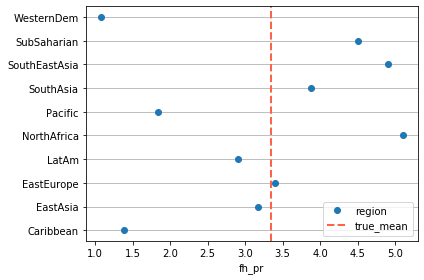

In [28]:
plot_dotplot(df, 'fh_pr', 'region', global_stat=True)

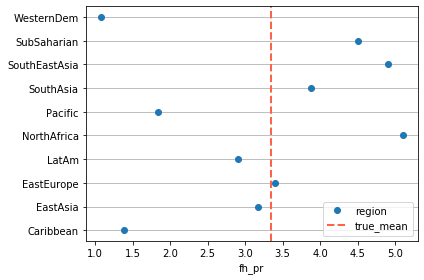

In [29]:
plot_dotplot(df, 'fh_pr', 'region', global_stat=True)

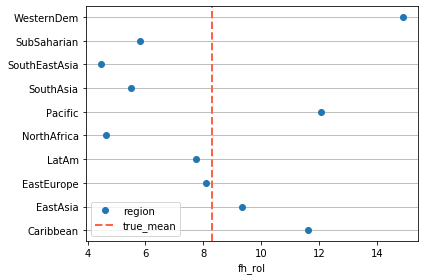

In [30]:
plot_dotplot(df, 'fh_rol', 'region', global_stat=True)

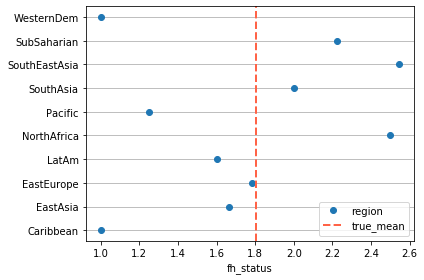

In [31]:
plot_dotplot(df, 'fh_status', 'region', global_stat=True)

### Ejercicio 6

In [32]:
df_sample.to_csv('subsample_gamc_demo.csv')

##### ---